## 포스트 코로나 데이터 시각화

- 가설1:  배달 시장의 수요가 증가로 인해 배달비가 인상될 것이다.
- 가설2:  코로나 확진자가 증가하는 시기에 바디/헤어 용품의 소비율은 감소할 것이다.

### 필요한 모듈 임포트

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import Series, DataFrame

import datetime

import warnings
warnings.filterwarnings('ignore')


os.name == 'nt'
plt.rc('font', family='Malgun Gothic')

##  가설2: 코로나 확진자가 증가하는 시기에 바디/헤어 용품의 소비율은 감소할 것이다.

- 데이터 불러오기 (유동인구)

In [ ]:
fpopl = pd.read_csv("C:/Users/user/Desktop/포스트코로나데이터/fpopl.csv")

In [5]:
#base_ymd 컬럼에서 데이터 출력 방식 정하기
fpopl['base_ymd'] = fpopl['base_ymd'].astype(str)
fpopl['base_ymd'] = fpopl['base_ymd'].apply(lambda x : x[:4] + '-' + x[-2:])
fpopl['base_ymd'] = pd.to_datetime(fpopl['base_ymd'])

fpopl['month'] = pd.to_datetime(fpopl['base_ymd']).dt.month
fpopl['year'] = pd.to_datetime(fpopl['base_ymd']).dt.year

fpopl

ValueError: Given date string not likely a datetime.

In [ ]:
#월 별 count
#fpopl_month_count = fpopl.resample('W').count()

ingusu =  fpopl.groupby("month")["popltn_cascnt"].mean()
ingusu

In [ ]:
#월 별로 유동인구 수 비교

ingusu.plot(x="month", y="popltn_cascnt", c="r", linestyle="dashed", marker='o', label='인구 수(단위: 명)')
plt.grid(True, c=".7")
plt.title("월 별 유동인구 수 (평균)")
plt.legend(shadow=True)
plt.xlabel("month")
plt.ylabel("유동 인구")

#### - > 전국적으로 3월달까지는 인구 수가 줄어들다가 3월 이후로 증가함을 알 수 있다.

- 시간에 따른 바디.헤어 용품 구매율 변화 시각화

In [2]:
#데이터 불러오기 (구매 물품)
index = pd.read_csv("C:/Users/user/Desktop/포스트코로나데이터/index.csv")

In [3]:
index['period'] = index['period'].astype(str)
index['period'] = index['period'].apply(lambda x : x[:4] + '-' + x[-2:])
index['period'] = pd.to_datetime(index['period'])
index['month'] = pd.to_datetime(index['period']).dt.month
index['year'] = pd.to_datetime(index['period']).dt.year

index


,period,catl,catm,age,gender,sido,sigungu,cgi,month,year
0,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,1,2019
1,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,1,2019
2,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,1,2019
3,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,1,2019
4,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,1,2019
...,...,...,...,...,...,...,...,...,...,...
127520,2020-05-01,화장품,화장품,all,all,서울,강서구,51.365660,5,2020
127521,2020-05-01,화장품,화장품,all,all,서울,관악구,61.997865,5,2020
127522,2020-05-01,화장품,화장품,all,all,서울,금천구,82.198402,5,2020
127523,2020-05-01,화장품,화장품,all,all,서울,도봉구,35.875600,5,2020


In [6]:
# catm 컬럼의 유일한 값 추출

index['catm'].unique()

array(['건강관리용품', '가공식품', '기호식품', '담배', '빙과류', '빵류', '신선식품', '유제품류', '음료',
       '제과류', '주류', '생활용품', '애완동물용품', '기타화장품', '바디/헤어용품', '뷰티소품', '화장품'],
      dtype=object)

In [7]:
# 월 별로 바디/헤어용품을 얼마나 소비하는지 count

grouped = index.groupby("catm")
df = grouped.get_group("바디/헤어용품")
df

,period,catl,catm,age,gender,sido,sigungu,cgi,month,year
275,2019-01-01,화장품,바디/헤어용품,20,F,서울,all,113.304424,1,2019
276,2019-01-01,화장품,바디/헤어용품,20,F,서울,강서구,99.919991,1,2019
277,2019-01-01,화장품,바디/헤어용품,20,F,서울,광진구,127.768558,1,2019
278,2019-01-01,화장품,바디/헤어용품,20,F,서울,양천구,50.103144,1,2019
279,2019-01-01,화장품,바디/헤어용품,20,F,서울,영등포구,101.369395,1,2019
...,...,...,...,...,...,...,...,...,...,...
127473,2020-05-01,화장품,바디/헤어용품,all,all,서울,구로구,53.062122,5,2020
127474,2020-05-01,화장품,바디/헤어용품,all,all,서울,노원구,52.026428,5,2020
127475,2020-05-01,화장품,바디/헤어용품,all,all,서울,종로구,28.760171,5,2020
127476,2020-05-01,화장품,바디/헤어용품,all,all,서울,중구,49.199326,5,2020


In [44]:
df_cgi = df[df['year']==2020].groupby('month')['cgi'].mean()

df_cgi

month
1    118.893374
2     74.402123
3     63.998689
4     59.790025
5     58.451246
Name: cgi, dtype: float64

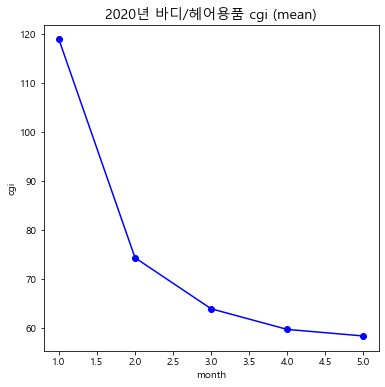

In [40]:
# 바디/헤어용품 소비지수 변화 시각화

fig = plt.figure()
fig.set_size_inches(6, 6)
df_cgi.plot(x="month", y="cgi", c="b", linestyle="-", marker='o', label='2020년 바디/헤어용품 cgi')
plt.ylabel("cgi")
plt.title('2020년 바디/헤어용품 cgi (mean)', fontsize = 14)
plt.show()

In [72]:
#성별에 따른 바디/헤어용품 소비율 비교
df_pv = df.pivot_table(['cgi'],index = ['year', 'month'], columns = index.gender)
df_pv


#sns.lineplot(x="month", y="cgi", hue="gender", data=df_pv)

cgi                        
gender               F           M         all
year month                                    
2019 1       99.852394  177.833831  119.266960
     2       79.520937   82.655915   77.091986
     3       88.050951   86.950518   84.635911
     4       82.114495   95.746497   83.673960
     5       92.253113   88.547466   87.891688
     6       86.254702   89.126335   83.095554
     7       86.014898   87.198607   83.251221
     8      101.953049  116.702715  102.758154
     9      107.747123  121.549178  106.219268
     10      77.367475   78.366946   73.971383
     11      79.329492   81.261153   76.611822
     12      87.338990   84.540176   83.797945
2020 1      118.054075  123.865981  114.749306
     2       75.620223   74.872027   72.714119
     3       65.017829   64.971704   62.019010
     4       61.576830   58.705164   59.088080
     5       59.354633   59.200751   56.807961

<AxesSubplot:xlabel='year,month'>

<Figure size 864x864 with 0 Axes>

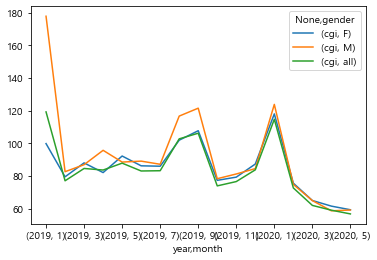

In [71]:
fig = plt.figure()
fig.set_size_inches(12, 12)
df_pv.plot()